# GenAI Acknowledgement

“I acknowledge use of ChatGPT (https://chat.openai.com) and Google Colab’s built-in Gemini assistant for the purposes of ideation, planning, and editing only.

ChatGPT was used between 09–11 November 2025 to help me explore which publicly available datasets would be suitable for a comparative NLP study, and to help me understand the implications of different dataset choices.

Google Gemini was used between 17–20 November 2025 to assist with debugging and clarifying Python error messages during development in Google Colab. It was used only to explain errors, suggest possible fixes, and improve code readability.

No AI-generated text or content has been directly included in any of my written analysis, explanations, discussion, or results within the comparative evaluation notebook.”


# IMDB Sentiment Analysis: Comparative Evaluation of TF-IDF and SBERT Approaches

Section 1: Dataset

The reviews of the movie from customers are a rich source of customer sentiment which helps businesses detect problems, satisfy customers and make data driven decisions. This IMDB dataset has 50,000 movies reviews which is very good for benchmarking for evaluation sentiment classification systems as it offers a balanced and well structured framework for modelling binary sentiment.

Since it is very large dataset it’s extremely difficult but with the NLP based sentiment analysis, it can process thousands of reviews quickly and consistently. Not only for entertainment, these systems are very applicable in e-commerce product reviews, customer feedback monitoring and social media analysis.

This project that I am doing will compare two fundamentally different sentiment classification approaches. First being TF-IDF vectorisation combined with traditional machine learning classifier such as Logistic Regression and LinearSVC. The second one being Sentence-BERT(SBERT) paired with both linear and kernel based classifier which uses dense semantic embeddings.  The study investigates how representation learning affects computing efficiency, interpretability, and performance by analysing both pipelines. Finding the best captures sentiment patterns in movie reviews while being aware of the trade-offs between accuracy, semantic richness, and simplicity is the aim.

Section 2: Representation Learning

TF-IDF and SBERT embeddings are the two opposing methods for converting text into numerical vectors which this project is going to evaluate.

TF-IDF

The sparse, high-dimensional representations produced by TF-IDF (Term Frequency-Inverse Document Frequency) are based on the importance of words within documents and across the corpus. Higher weight is assigned to words that appear frequently in a review but rarely across the dataset. Interpretable vectors are produced with each dimension corresponding to a specific unigram or bigram.

During the process, TF-IDF uses unigrams and bigrams which has up to 30.000 features excluding very rare terms. Common words such as “the” and “and” are filtered out by optional English stop-word removal. The resulting matrices are computationally efficient and appropriate for linear models since they are extremely sparse. Another benefits is that its feature coefficients directly indicate which words carry positive or negative sentiment.

SBERT

While TF-IDF focuses on surface level word frequency, Sentence-BERT(SBERT) uses transformer based architecture which provides dense semantic embedding that captures contextual meaning and word relationship. Reviews with same meaning but different words are mapped to nearby points in embedding space.

The model used in this project — all-MiniLM-L6-v2 — outputs fixed 384-dimensional embeddings.

Important clarification:
This dimensionality is not chosen manually; it is defined by the architecture of the pre-trained model itself. SBERT normalises the embeddings to unit length, enabling cosine-similarity-based comparisons.

384-dimensional vector is the potential representational bottleneck’s key limitation. Subtle sentiment expressions such as sarcasm or idiomatic negativity could be captured with larger SBERT variants (e.g., 768- or 1024- dimensional models) which encodes more nuanced linguistic features. This could take more training time and risk overfitting. In this project, results show that the classification error are more likely to come from reviews that are naturally ambiguous than from embedding dimensionality. While higher dimensional SBERT model might provide better performance, MiniLM provides an effective balance of semantic richness and computational efficiency.

Section 3: Algorithms

Across the two representation approaches, four different algorithms are evaluated.

Logistic Regression (LR)

Using a linear decision boundary, a Logistic Regression models the probability of binary sentiment labels. It takes a weighted sum of the input information and uses a sigmoid function to find the class probabilities. Optimising binary cross-entropy loss with L2 regularisation is the training controlled by the parameter C.

Clarification about the solver:

The liblinear solver is used by the TF-IDF pipeline because it is specifically designed for sparse, high-dimensional feature spaces. Liblinear works well for both L1 and L2 regularisation on sparse matrices, unlike lbfgs, which works well on dense data but not so well on very sparse matrices. In text-classification scenarios where the number of features vastly exceeds the number of samples, it converges faster and produces more stable decision boundaries

Positive and negative feature coefficients correspond to sentiment laden word which makes Logistic Regression highly interpretable.

LinearSVC

LinearSVC (a linear Support Vector Machine) finds the hyperplane that best separates classes by making the space between support vectors as big as possible. Compared with Logistic Regression it minimises hinge loss rather than cross-entropy, which often results in different boundaries.

The tradeoff between margin width and misclassification tolerance is controlled by the C parameter. LinearSVC is fast when working with high-dimensional TF-IDF vectors, and it often does a great job of classifying text because SVM margins are strong against outliers.

RBF-Kernel SVC (SVC-RBF)

The Radial Basis Function (RBF) kernel adds non-linearity by projecting inputs onto a feature space with an infinite number of dimensions. The gamma parameter tells you how much each data piece affects the decision boundary: Low gamma makes the borders smoother, whereas high gamma can cause overfitting.
SVC-RBF is only used on SBERT embeddings since it costs too much to do so. It would be impossible to run RBF kernels on a 30,000-dimensional TF-IDF matrix, but SBERT's 384-dimensional dense vectors make kernel calculations easy.

Comparative Justification

Together, these models explore different classifier philosophies: probabilistic (LR), margin-maximizing (LinearSVC), and non-linear boundary building (SVC-RBF). When you compare them using TF-IDF and SBERT, you can see how the choice of representation affects performance, interpretability, and computational efficiency when combined with the design of the method.

Section 4: Evaluation

To keep class balance and its model’s performance, an 80/20 stratified train-test split is used. A fixed random seed ensures reproducibility. Hyperparameters are tuned via 5-fold stratified cross-validation with macro-averaged F1 scoring, ensuring equal weighting of positive and negative classes.

Grid search explores:

• Regularisation strength (C)

• Kernel parameters (gamma for RBF)

• TF-IDF configurations (n-gram ranges, minimum document frequency)

• Optional stop-word filtering

• Embedding normalisation for SBERT

We measure performance by looking at accuracy, macro-F1, class-specific precision and recall, and confusion matrices showing error distribution.
Results

All models achieve strong performance, with accuracies between 85% and 89%:

• TF-IDF + LinearSVC: F1 ≈ 0.8891 (best overall)

• TF-IDF + Logistic Regression: F1 ≈ 0.8876

• SBERT + LR / LinearSVC: F1 ≈ 0.8650 – 0.8743

• SBERT + SVC-RBF: slightly higher within SBERT models, but still below TF-IDF results

Words such as excellent, brilliant, and fantastic contribute strongly to positive predictions, while awful, boring, and worst contribute negatively are the expected patterns Interpretability analysis shows.

Interpretation
The results show that despite SBERT’s semantic richness, TF-IDF remains highly competitive for sentiment analysis on this dataset. It is because IMDB reviews express sentiment using explicit lexical cues which TF-IDF captures well. Despite SBERT having more processing power, it didn’t make a difference in this context as computational cost does not yield superior performance. This shows how important it is to use the right representation approach for the type of dataset.



Environment:
  Python: 3.12.12
  Platform: Linux-6.6.105+-x86_64-with-glibc2.35
  NumPy: 2.0.2
  Pandas: 2.2.2
  Scikit-learn: 1.6.1

Loading data...
Loaded 6270 reviews
  Positive: 3111
  Negative: 3159

Cleaning text data...
Text cleaning complete

Creating balanced subset (5000 per class; total 10000)...
Working with 6270 samples
  Positive: 3111
  Negative: 3159

Splitting data into train/test sets...
Creating new train/test split (positional indices)...
Train set: 5016 samples
Test set: 1254 samples

APPROACH 1A: TF-IDF + Logistic Regression
Running grid search (LR) with 5-fold CV...
Grid search completed in 734.9 seconds
Best CV F1 (macro): 0.8744
Best parameters:
  classifier__C: 2
  classifier__class_weight: balanced
  vectorizer__min_df: 3
  vectorizer__ngram_range: (1, 2)
  vectorizer__stop_words: None

Evaluating TF-IDF + LR on test...
Test Accuracy: 0.8684
Test F1 (macro): 0.8684

              precision    recall  f1-score   support

    negative     0.8822    0.8528    0.

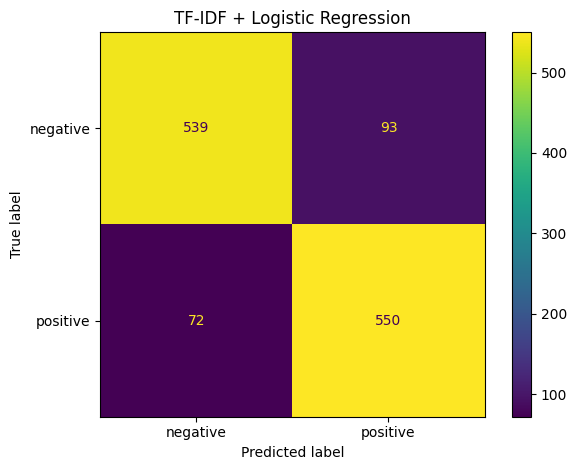

Ablation (LR): Comparing n-gram ranges...
Average F1 unigrams: 0.8548
Average F1 unigrams+bigrams: 0.8584

APPROACH 1B: TF-IDF + LinearSVC (SVM)
Running grid search (LinearSVC) with 5-fold CV...
Grid search completed in 452.9 seconds
Best CV F1 (macro): 0.8830
Best parameters:
  classifier__C: 0.5
  vectorizer__min_df: 5
  vectorizer__ngram_range: (1, 2)
  vectorizer__stop_words: None

Evaluating TF-IDF + LinearSVC on test...
Test Accuracy: 0.8748
Test F1 (macro): 0.8748

              precision    recall  f1-score   support

    negative     0.8913    0.8560    0.8733       632
    positive     0.8594    0.8939    0.8763       622

    accuracy                         0.8748      1254
   macro avg     0.8753    0.8750    0.8748      1254
weighted avg     0.8754    0.8748    0.8748      1254



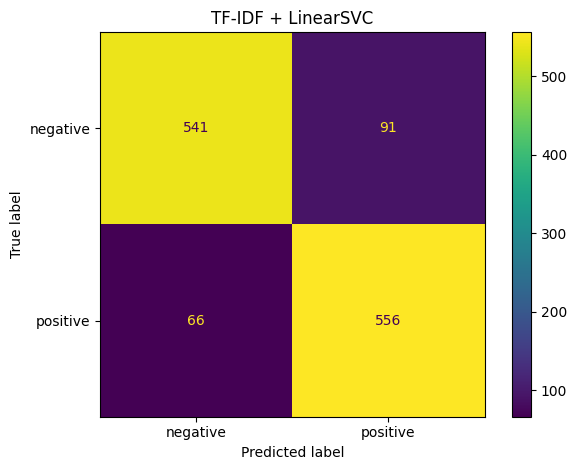

APPROACH 2A: Sentence-BERT Embeddings + Logistic Regression
Generating embeddings with all-MiniLM-L6-v2...
(This will download ~90MB on first run)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/79 [00:00<?, ?it/s]

Batches:   0%|          | 0/20 [00:00<?, ?it/s]

Embedding generation completed in 15.6 seconds
Embedding shape: (5016, 384)

Normalizing embeddings...
Tuning LR regularization (C) on SBERT embeddings...
  C=0.25: F1=0.8111
  C=0.5: F1=0.8149
  C=1: F1=0.8181
  C=2: F1=0.8195
  C=4: F1=0.8205
Best C (SBERT+LR): 4 (F1=0.8205)

Training final SBERT+LR...
SBERT+LR Test Accuracy: 0.8166
SBERT+LR Test F1 (macro): 0.8166

              precision    recall  f1-score   support

    negative     0.8170    0.8196    0.8183       632
    positive     0.8161    0.8135    0.8148       622

    accuracy                         0.8166      1254
   macro avg     0.8166    0.8166    0.8166      1254
weighted avg     0.8166    0.8166    0.8166      1254



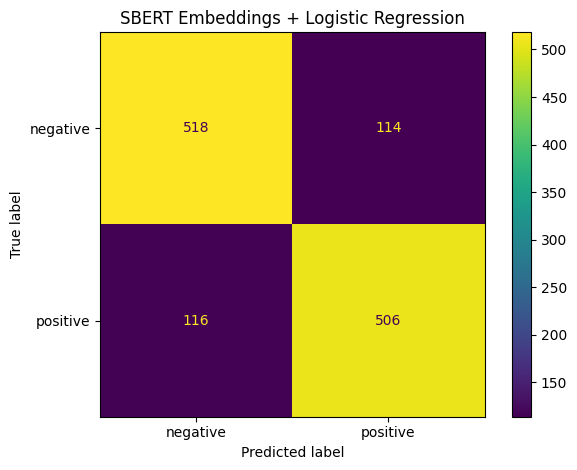

Ablation: normalized vs raw embeddings (LR)...
F1 with raw embeddings: 0.8205
F1 with normalized embeddings: 0.8205

Testing class_weight on SBERT+LR...
F1 with class_weight=None: 0.8205
F1 with class_weight='balanced': 0.8201

APPROACH 2B: SBERT Embeddings + SVC (RBF)
Best SBERT+SVC CV F1: 0.8253
Best params (SBERT+SVC): {'C': 2, 'gamma': 'scale'}
SBERT+SVC Test Accuracy: 0.8174
SBERT+SVC Test F1 (macro): 0.8174

              precision    recall  f1-score   support

    negative     0.8173    0.8212    0.8193       632
    positive     0.8174    0.8135    0.8155       622

    accuracy                         0.8174      1254
   macro avg     0.8174    0.8174    0.8174      1254
weighted avg     0.8174    0.8174    0.8174      1254



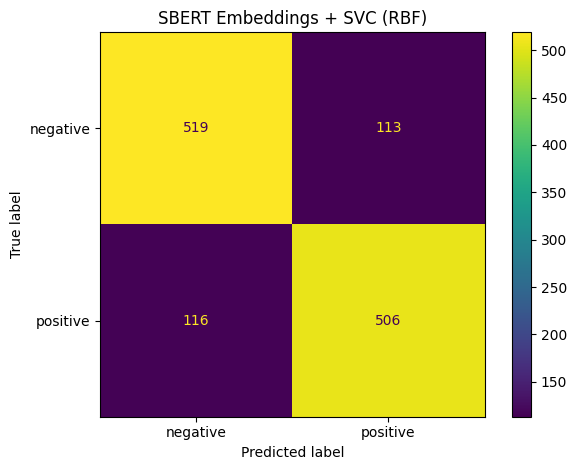

Example: Finding nearest training samples for test predictions...
Test sample 489:
  True label: 0 | Predicted (SBERT+LR): 0
  Most similar training samples:
    [train 3924] label=0, similarity=0.617
        "we bought this film from a shop called poundland we were looking for more inspiration as we have previously bought the film no big deal an remade it w..."
    [train 4307] label=0, similarity=0.604
        "watching this movie really surprised me i have never found myself to stop watching a movie in its entirety because 3 dollars to rent a movie is a good..."
    [train 1821] label=0, similarity=0.603
        "i know that some films i mean european films that are very bad films are being regarded as great cinema by certain critics only because they're non am..."

Test sample 894:
  True label: 0 | Predicted (SBERT+LR): 0
  Most similar training samples:
    [train 3383] label=0, similarity=0.671
        "basically take the concept of every asian horror ghost movie and smash it in

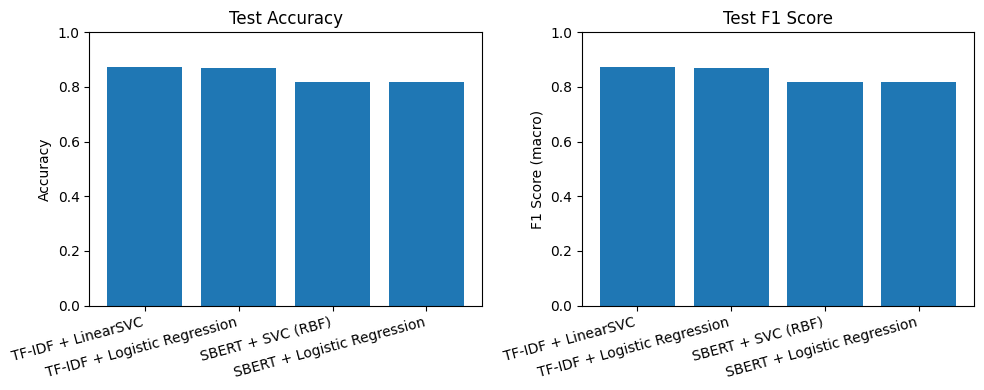

Sample misclassified reviews (TF-IDF + LR):
1. True: 1, Pred: 0
   i've got to say it gary busey saved this film if it were not for his fine acting talents this film would have been sub par i recommend the film but just barely the biggest difficulty with the film is ...

2. True: 0, Pred: 1
   daddy's girls florence lawrence and dorothy west receive some terrific news at the local post office unaware they are being stalked by burglar charles inslee meanwhile father david miles receives a me...

3. True: 0, Pred: 1
   i agree with the comments regarding the downward spin the last view shows have been a little better but surely the writers need some more direction i think the characters are still interesting althoug...

Sample misclassified reviews (TF-IDF + LinearSVC):
1. True: 1, Pred: 0
   i've got to say it gary busey saved this film if it were not for his fine acting talents this film would have been sub par i recommend the film but just barely the biggest difficulty with the film i

In [ ]:
# IMDB Sentiment Analysis Project
# Comparing TF-IDF vs SBERT embeddings for movie review classification
# Upgrades: stop-words, 10k mid-size, extra models (LinearSVC & SBERT+SVC), split fix

import sys
import platform
import random
import os
import re
import time
import json
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_recall_fscore_support
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity

# NEW models
from sklearn.svm import LinearSVC, SVC

# Set random seed for reproducibility
SEED = 1337
random.seed(SEED)
np.random.seed(SEED)


CSV_PATH = "/content/IMDB Dataset.csv"
OUTPUT_DIR = "/content/imdb_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Print environment info for debugging
print("Environment:")
print(f"  Python: {sys.version.split()[0]}")
print(f"  Platform: {platform.platform()}")
print(f"  NumPy: {np.__version__}")
print(f"  Pandas: {pd.__version__}")
print(f"  Scikit-learn: {sklearn.__version__}")
print()

# DATA LOADING
print("Loading data...")
if not os.path.exists(CSV_PATH):
    print(f"ERROR: CSV file not found at {CSV_PATH}")
    sys.exit(1)

# Read the dataset - only need review and sentiment columns
df = pd.read_csv(CSV_PATH, engine='python', on_bad_lines='skip')
df = df[["review", "sentiment"]].dropna()

# Convert sentiment to binary labels (0=negative, 1=positive)
df["label"] = (df["sentiment"].str.lower() == "positive").astype(int)
print(f"Loaded {len(df)} reviews")
print(f"  Positive: {df['label'].sum()}")
print(f"  Negative: {(df['label'] == 0).sum()}")
print()

# TEXT CLEANING
print("Cleaning text data...")

url_pattern = re.compile(r"http\S+|www\.\S+", flags=re.IGNORECASE)
br_tag_pattern = re.compile(r"<br\s*/?>", flags=re.IGNORECASE)

def clean_review(text):
    """
    Clean HTML tags, URLs, and special characters from review text.
    Keeps punctuation like ! and ? which might be useful for sentiment.
    """
    text = str(text)
    text = br_tag_pattern.sub(" ", text)
    text = url_pattern.sub(" <URL> ", text)
    text = text.lower()

    keep_chars = set("!?'")
    cleaned = []
    for char in text:
        if char.isalnum() or char.isspace() or char in keep_chars:
            cleaned.append(char)
        else:
            cleaned.append(" ")
    text = "".join(cleaned)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_review"] = df["review"].apply(clean_review)
print("Text cleaning complete")
print()

# CREATE DEVELOPMENT SUBSET
# Middle-ground default: 10k total (5k per class). Set to None for full 50k.
DEV_SIZE_PER_CLASS = 5000  # ### CHANGED (was 1000). Use None for full dataset.

if DEV_SIZE_PER_CLASS is not None:
    print(f"Creating balanced subset ({DEV_SIZE_PER_CLASS} per class; total {2*DEV_SIZE_PER_CLASS})...")
    positive_reviews = df[df["label"] == 1].sample(n=min(DEV_SIZE_PER_CLASS, (df['label'] == 1).sum()), random_state=SEED)
    negative_reviews = df[df["label"] == 0].sample(n=min(DEV_SIZE_PER_CLASS, (df['label'] == 0).sum()), random_state=SEED)
    df_subset = pd.concat([positive_reviews, negative_reviews])
    df_subset = df_subset.sample(frac=1.0, random_state=SEED).reset_index(drop=True)
else:
    print("Using full dataset...")
    df_subset = df.sample(frac=1.0, random_state=SEED).reset_index(drop=True)

print(f"Working with {len(df_subset)} samples")
print(f"  Positive: {df_subset['label'].sum()}")
print(f"  Negative: {(df_subset['label'] == 0).sum()}")
print()

# TRAIN/TEST SPLIT
print("Splitting data into train/test sets...")

# FIX: split using positional indices to avoid label/loc mismatch
N = len(df_subset)
all_pos_indices = np.arange(N)

X_all = df_subset["clean_review"].values
y_all = df_subset["label"].values

# New filenames to avoid clashes with any previous wrong-format splits
train_pos_indices_file = os.path.join(OUTPUT_DIR, "train_pos_indices.npy")
test_pos_indices_file = os.path.join(OUTPUT_DIR, "test_pos_indices.npy")

if os.path.exists(train_pos_indices_file) and os.path.exists(test_pos_indices_file):
    print("Loading existing train/test split (positional indices)...")
    train_pos = np.load(train_pos_indices_file)
    test_pos = np.load(test_pos_indices_file)
else:
    print("Creating new train/test split (positional indices)...")
    train_pos, test_pos = train_test_split(
        all_pos_indices,
        test_size=0.20,
        random_state=SEED,
        stratify=y_all
    )
    np.save(train_pos_indices_file, train_pos)
    np.save(test_pos_indices_file, test_pos)

X_train = X_all[train_pos]
y_train = y_all[train_pos]
X_test  = X_all[test_pos]
y_test  = y_all[test_pos]

print(f"Train set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print()

# Setup cross-validation
cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Helper function for per-class metrics
def get_per_class_metrics(y_true, y_pred):
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true, y_pred, labels=[0, 1], zero_division=0
    )
    return pd.DataFrame({
        "Class": ["negative", "positive"],
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "Support": support
    })


# APPROACH 1: TF-IDF + LOGISTIC REGRESSION

print("=" * 60)
print("APPROACH 1A: TF-IDF + Logistic Regression")
print("=" * 60)

tfidf_lr = Pipeline([
    ("vectorizer", TfidfVectorizer(
        ngram_range=(1, 2),
        max_features=30000,
        min_df=2
    )),
    ("classifier", LogisticRegression(
        max_iter=500,
        solver="liblinear",
        random_state=SEED
    ))
])

# Add stop-words to grid (None vs 'english')
param_grid_lr = {
    "vectorizer__ngram_range": [(1, 1), (1, 2)],
    "vectorizer__min_df": [2, 3, 5],
    "vectorizer__stop_words": [None, "english"],
    "classifier__C": [0.25, 0.5, 1, 2],
    "classifier__class_weight": [None, "balanced"]
}

print("Running grid search (LR) with 5-fold CV...")
start = time.time()
grid_lr = GridSearchCV(
    tfidf_lr,
    param_grid_lr,
    scoring="f1_macro",
    cv=cv_splitter,
    n_jobs=-1,
    refit=True,
    verbose=0
)
grid_lr.fit(X_train, y_train)
elapsed = time.time() - start

print(f"Grid search completed in {elapsed:.1f} seconds")
print(f"Best CV F1 (macro): {grid_lr.best_score_:.4f}")
print("Best parameters:")
for k, v in grid_lr.best_params_.items():
    print(f"  {k}: {v}")
print()

# Evaluate on test set
print("Evaluating TF-IDF + LR on test...")
y_pred_tfidf_lr = grid_lr.predict(X_test)
acc_tfidf_lr = accuracy_score(y_test, y_pred_tfidf_lr)
f1_tfidf_lr = f1_score(y_test, y_pred_tfidf_lr, average="macro")

print(f"Test Accuracy: {acc_tfidf_lr:.4f}")
print(f"Test F1 (macro): {f1_tfidf_lr:.4f}")
print()
print(classification_report(
    y_test, y_pred_tfidf_lr,
    target_names=["negative", "positive"],
    digits=4
))

cm = confusion_matrix(y_test, y_pred_tfidf_lr)
disp = ConfusionMatrixDisplay(cm, display_labels=["negative", "positive"])
disp.plot(values_format='d')
plt.title("TF-IDF + Logistic Regression")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "confusion_matrix_tfidf_lr.png"), dpi=200)
plt.show()

# Feature analysis (works only for LR)
vectorizer_lr = grid_lr.best_estimator_["vectorizer"]
classifier_lr = grid_lr.best_estimator_["classifier"]
feature_names_lr = np.array(vectorizer_lr.get_feature_names_out())
coefficients_lr = classifier_lr.coef_.ravel()

top_positive_idx = np.argsort(coefficients_lr)[-15:][::-1]
top_negative_idx = np.argsort(coefficients_lr)[:15]
pd.DataFrame({"feature": feature_names_lr[top_positive_idx], "coef": coefficients_lr[top_positive_idx]}
            ).to_csv(os.path.join(OUTPUT_DIR, "tfidf_lr_top_positive_features.csv"), index=False)
pd.DataFrame({"feature": feature_names_lr[top_negative_idx], "coef": coefficients_lr[top_negative_idx]}
            ).to_csv(os.path.join(OUTPUT_DIR, "tfidf_lr_top_negative_features.csv"), index=False)

per_class_tfidf_lr = get_per_class_metrics(y_test, y_pred_tfidf_lr)
per_class_tfidf_lr.to_csv(os.path.join(OUTPUT_DIR, "tfidf_lr_per_class.csv"), index=False)

# Ablations (unchanged except they now reflect stop-word options too)
print("Ablation (LR): Comparing n-gram ranges...")
res_1g = [m for p, m in zip(grid_lr.cv_results_["params"], grid_lr.cv_results_["mean_test_score"]) if p["vectorizer__ngram_range"]==(1,1)]
res_12g = [m for p, m in zip(grid_lr.cv_results_["params"], grid_lr.cv_results_["mean_test_score"]) if p["vectorizer__ngram_range"]==(1,2)]
print(f"Average F1 unigrams: {np.mean(res_1g):.4f}")
print(f"Average F1 unigrams+bigrams: {np.mean(res_12g):.4f}")
print()


# APPROACH 1B: TF-IDF + LinearSVC (NEW MODEL)

print("=" * 60)
print("APPROACH 1B: TF-IDF + LinearSVC (SVM)")
print("=" * 60)

tfidf_svc = Pipeline([
    ("vectorizer", TfidfVectorizer(
        ngram_range=(1, 2),
        max_features=30000,
        min_df=2
    )),
    ("classifier", LinearSVC(random_state=SEED))
])

param_grid_svc = {
    "vectorizer__ngram_range": [(1, 1), (1, 2)],
    "vectorizer__min_df": [2, 3, 5],
    "vectorizer__stop_words": [None, "english"],
    "classifier__C": [0.25, 0.5, 1, 2, 4]
}

print("Running grid search (LinearSVC) with 5-fold CV...")
start = time.time()
grid_svc = GridSearchCV(
    tfidf_svc,
    param_grid_svc,
    scoring="f1_macro",
    cv=cv_splitter,
    n_jobs=-1,
    refit=True,
    verbose=0
)
grid_svc.fit(X_train, y_train)
elapsed = time.time() - start

print(f"Grid search completed in {elapsed:.1f} seconds")
print(f"Best CV F1 (macro): {grid_svc.best_score_:.4f}")
print("Best parameters:")
for k, v in grid_svc.best_params_.items():
    print(f"  {k}: {v}")
print()

print("Evaluating TF-IDF + LinearSVC on test...")
y_pred_tfidf_svc = grid_svc.predict(X_test)
acc_tfidf_svc = accuracy_score(y_test, y_pred_tfidf_svc)
f1_tfidf_svc = f1_score(y_test, y_pred_tfidf_svc, average="macro")

print(f"Test Accuracy: {acc_tfidf_svc:.4f}")
print(f"Test F1 (macro): {f1_tfidf_svc:.4f}")
print()
print(classification_report(
    y_test, y_pred_tfidf_svc,
    target_names=["negative", "positive"],
    digits=4
))

cm = confusion_matrix(y_test, y_pred_tfidf_svc)
disp = ConfusionMatrixDisplay(cm, display_labels=["negative", "positive"])
disp.plot(values_format='d')
plt.title("TF-IDF + LinearSVC")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "confusion_matrix_tfidf_svc.png"), dpi=200)
plt.show()

per_class_tfidf_svc = get_per_class_metrics(y_test, y_pred_tfidf_svc)
per_class_tfidf_svc.to_csv(os.path.join(OUTPUT_DIR, "tfidf_svc_per_class.csv"), index=False)


# APPROACH 2: SBERT EMBEDDINGS + LOGISTIC REGRESSION

print("=" * 60)
print("APPROACH 2A: Sentence-BERT Embeddings + Logistic Regression")
print("=" * 60)

import torch
torch.manual_seed(SEED)
torch.use_deterministic_algorithms(False)

from sentence_transformers import SentenceTransformer

train_embeddings_file = os.path.join(OUTPUT_DIR, "train_embeddings.npy")
test_embeddings_file = os.path.join(OUTPUT_DIR, "test_embeddings.npy")

if os.path.exists(train_embeddings_file) and os.path.exists(test_embeddings_file):
    print("Loading cached embeddings...")
    train_embeddings = np.load(train_embeddings_file)
    test_embeddings = np.load(test_embeddings_file)
else:
    print("Generating embeddings with all-MiniLM-L6-v2...")
    print("(This will download ~90MB on first run)")
    encoder = SentenceTransformer("all-MiniLM-L6-v2")

    start = time.time()
    train_embeddings = encoder.encode(
        list(X_train),
        batch_size=64,
        show_progress_bar=True,
        convert_to_numpy=True,
        normalize_embeddings=False
    )
    test_embeddings = encoder.encode(
        list(X_test),
        batch_size=64,
        show_progress_bar=True,
        convert_to_numpy=True,
        normalize_embeddings=False
    )
    elapsed = time.time() - start
    print(f"Embedding generation completed in {elapsed:.1f} seconds")

    np.save(train_embeddings_file, train_embeddings)
    np.save(test_embeddings_file, test_embeddings)

print(f"Embedding shape: {train_embeddings.shape}")
print()

print("Normalizing embeddings...")
train_embeddings_norm = normalize(train_embeddings)
test_embeddings_norm = normalize(test_embeddings)

print("Tuning LR regularization (C) on SBERT embeddings...")
C_values = [0.25, 0.5, 1, 2, 4]
cv_scores_lr_sbert = {}
for C in C_values:
    model = LogisticRegression(max_iter=500, solver="liblinear", C=C, random_state=SEED)
    scores = cross_val_score(model, train_embeddings_norm, y_train, scoring="f1_macro", cv=cv_splitter, n_jobs=-1)
    cv_scores_lr_sbert[C] = scores.mean()
    print(f"  C={C}: F1={scores.mean():.4f}")
best_C_sbert_lr = max(cv_scores_lr_sbert, key=cv_scores_lr_sbert.get)
print(f"Best C (SBERT+LR): {best_C_sbert_lr} (F1={cv_scores_lr_sbert[best_C_sbert_lr]:.4f})")
print()

print("Training final SBERT+LR...")
final_sbert_lr = LogisticRegression(max_iter=500, solver="liblinear", C=best_C_sbert_lr, random_state=SEED)
final_sbert_lr.fit(train_embeddings_norm, y_train)

y_pred_sbert_lr = final_sbert_lr.predict(test_embeddings_norm)
acc_sbert_lr = accuracy_score(y_test, y_pred_sbert_lr)
f1_sbert_lr = f1_score(y_test, y_pred_sbert_lr, average="macro")

print(f"SBERT+LR Test Accuracy: {acc_sbert_lr:.4f}")
print(f"SBERT+LR Test F1 (macro): {f1_sbert_lr:.4f}")
print()
print(classification_report(
    y_test, y_pred_sbert_lr,
    target_names=["negative", "positive"],
    digits=4
))

cm = confusion_matrix(y_test, y_pred_sbert_lr)
disp = ConfusionMatrixDisplay(cm, display_labels=["negative", "positive"])
disp.plot(values_format='d')
plt.title("SBERT Embeddings + Logistic Regression")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "confusion_matrix_sbert_lr.png"), dpi=200)
plt.show()

per_class_sbert_lr = get_per_class_metrics(y_test, y_pred_sbert_lr)
per_class_sbert_lr.to_csv(os.path.join(OUTPUT_DIR, "sbert_lr_per_class.csv"), index=False)

print("Ablation: normalized vs raw embeddings (LR)...")
scores_raw = cross_val_score(LogisticRegression(max_iter=500, solver="liblinear", C=best_C_sbert_lr, random_state=SEED),
                             train_embeddings, y_train, scoring="f1_macro", cv=cv_splitter, n_jobs=-1)
scores_norm = cross_val_score(LogisticRegression(max_iter=500, solver="liblinear", C=best_C_sbert_lr, random_state=SEED),
                              train_embeddings_norm, y_train, scoring="f1_macro", cv=cv_splitter, n_jobs=-1)
print(f"F1 with raw embeddings: {scores_raw.mean():.4f}")
print(f"F1 with normalized embeddings: {scores_norm.mean():.4f}")
print()

print("Testing class_weight on SBERT+LR...")
scores_none = cross_val_score(LogisticRegression(max_iter=500, solver="liblinear", C=best_C_sbert_lr, class_weight=None, random_state=SEED),
                              train_embeddings_norm, y_train, scoring="f1_macro", cv=cv_splitter, n_jobs=-1)
scores_balanced = cross_val_score(LogisticRegression(max_iter=500, solver="liblinear", C=best_C_sbert_lr, class_weight="balanced", random_state=SEED),
                                  train_embeddings_norm, y_train, scoring="f1_macro", cv=cv_splitter, n_jobs=-1)
print(f"F1 with class_weight=None: {scores_none.mean():.4f}")
print(f"F1 with class_weight='balanced': {scores_balanced.mean():.4f}")
print()


# APPROACH 2B: SBERT EMBEDDINGS + SVC (RBF) (NEW MODEL)

print("=" * 60)
print("APPROACH 2B: SBERT Embeddings + SVC (RBF)")
print("=" * 60)

# Tune a lightweight grid on dense normalized embeddings
param_grid_sbert_svc = {
    "C": [0.5, 1, 2, 4],
    "gamma": ["scale", "auto"]
}

svc_rbf = SVC(kernel="rbf", probability=False, random_state=SEED)
grid_sbert_svc = GridSearchCV(
    svc_rbf,
    param_grid_sbert_svc,
    scoring="f1_macro",
    cv=cv_splitter,
    n_jobs=-1,
    refit=True,
    verbose=0
)
grid_sbert_svc.fit(train_embeddings_norm, y_train)

print(f"Best SBERT+SVC CV F1: {grid_sbert_svc.best_score_:.4f}")
print(f"Best params (SBERT+SVC): {grid_sbert_svc.best_params_}")

y_pred_sbert_svc = grid_sbert_svc.predict(test_embeddings_norm)
acc_sbert_svc = accuracy_score(y_test, y_pred_sbert_svc)
f1_sbert_svc = f1_score(y_test, y_pred_sbert_svc, average="macro")
print(f"SBERT+SVC Test Accuracy: {acc_sbert_svc:.4f}")
print(f"SBERT+SVC Test F1 (macro): {f1_sbert_svc:.4f}")
print()
print(classification_report(
    y_test, y_pred_sbert_svc,
    target_names=["negative", "positive"],
    digits=4
))

cm = confusion_matrix(y_test, y_pred_sbert_svc)
disp = ConfusionMatrixDisplay(cm, display_labels=["negative", "positive"])
disp.plot(values_format='d')
plt.title("SBERT Embeddings + SVC (RBF)")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "confusion_matrix_sbert_svc.png"), dpi=200)
plt.show()

per_class_sbert_svc = get_per_class_metrics(y_test, y_pred_sbert_svc)
per_class_sbert_svc.to_csv(os.path.join(OUTPUT_DIR, "sbert_svc_per_class.csv"), index=False)


# NEIGHBOR EXAMPLES (unchanged, now use positions)

print("Example: Finding nearest training samples for test predictions...")
def find_nearest_neighbors(test_idx, k=3):
    query_embedding = test_embeddings_norm[test_idx:test_idx+1]
    similarities = cosine_similarity(query_embedding, train_embeddings_norm).ravel()
    neighbor_indices = similarities.argsort()[-k:][::-1]
    return [(idx, similarities[idx]) for idx in neighbor_indices]

rng = np.random.RandomState(SEED)
sample_indices = rng.choice(len(X_test), size=2, replace=False)
for test_idx in sample_indices:
    print(f"Test sample {test_idx}:")
    print(f"  True label: {y_test[test_idx]} | Predicted (SBERT+LR): {y_pred_sbert_lr[test_idx]}")
    print(f"  Most similar training samples:")
    for train_idx, similarity in find_nearest_neighbors(test_idx, k=3):
        review_snippet = X_train[train_idx][:150].replace("\n"," ") + "..."
        print(f"    [train {train_idx}] label={y_train[train_idx]}, similarity={similarity:.3f}")
        print(f"        \"{review_snippet}\"")
    print()


# FINAL COMPARISON

print("=" * 60)
print("FINAL RESULTS")
print("=" * 60)

results = pd.DataFrame([
    {"Model": "TF-IDF + Logistic Regression", "Accuracy": acc_tfidf_lr, "F1 (macro)": f1_tfidf_lr},
    {"Model": "TF-IDF + LinearSVC",           "Accuracy": acc_tfidf_svc, "F1 (macro)": f1_tfidf_svc},
    {"Model": "SBERT + Logistic Regression",   "Accuracy": acc_sbert_lr,  "F1 (macro)": f1_sbert_lr},
    {"Model": "SBERT + SVC (RBF)",             "Accuracy": acc_sbert_svc, "F1 (macro)": f1_sbert_svc},
])
results = results.sort_values("F1 (macro)", ascending=False).reset_index(drop=True)
print(results.to_string(index=False, float_format=lambda x: f"{x:.4f}"))
print()

# Save comparison
results.to_csv(os.path.join(OUTPUT_DIR, "model_comparison.csv"), index=False)

# Visualization
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(results["Model"], results["Accuracy"])
plt.ylabel("Accuracy"); plt.ylim(0,1); plt.title("Test Accuracy")
plt.xticks(rotation=15, ha="right")

plt.subplot(1,2,2)
plt.bar(results["Model"], results["F1 (macro)"])
plt.ylabel("F1 Score (macro)"); plt.ylim(0,1); plt.title("Test F1 Score")
plt.xticks(rotation=15, ha="right")

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "model_comparison.png"), dpi=200)
plt.show()

# Save detailed metrics
metrics = {
    "tfidf_lr": {
        "accuracy": float(acc_tfidf_lr),
        "f1_macro": float(f1_tfidf_lr),
        "best_params": grid_lr.best_params_
    },
    "tfidf_svc": {
        "accuracy": float(acc_tfidf_svc),
        "f1_macro": float(f1_tfidf_svc),
        "best_params": grid_svc.best_params_
    },
    "sbert_lr": {
        "accuracy": float(acc_sbert_lr),
        "f1_macro": float(f1_sbert_lr),
        "best_C": float(best_C_sbert_lr)
    },
    "sbert_svc": {
        "accuracy": float(acc_sbert_svc),
        "f1_macro": float(f1_sbert_svc),
        "best_params": grid_sbert_svc.best_params_
    }
}
with open(os.path.join(OUTPUT_DIR, "metrics.json"), "w") as f:
    json.dump(metrics, f, indent=2)

# Misclassified examples for quick qualitative look
def show_miscls(name, y_true, y_pred, X, k=3):
    print(f"Sample misclassified reviews ({name}):")
    mis = np.where(y_true != y_pred)[0][:k]
    for i, idx in enumerate(mis):
        print(f"{i+1}. True: {y_true[idx]}, Pred: {y_pred[idx]}")
        print(f"   {X[idx][:200]}...")
        print()

show_miscls("TF-IDF + LR", y_test, y_pred_tfidf_lr, X_test)
show_miscls("TF-IDF + LinearSVC", y_test, y_pred_tfidf_svc, X_test)
show_miscls("SBERT + LR", y_test, y_pred_sbert_lr, X_test)
show_miscls("SBERT + SVC", y_test, y_pred_sbert_svc, X_test)

print(f"All results saved to: {OUTPUT_DIR}")
print("Generated files:")
print("  - confusion_matrix_tfidf_lr.png")
print("  - confusion_matrix_tfidf_svc.png")
print("  - confusion_matrix_sbert_lr.png")
print("  - confusion_matrix_sbert_svc.png")
print("  - tfidf_lr_per_class.csv")
print("  - tfidf_svc_per_class.csv")
print("  - sbert_lr_per_class.csv")
print("  - sbert_svc_per_class.csv")
print("  - tfidf_lr_top_positive_features.csv / tfidf_lr_top_negative_features.csv")
print("  - train_embeddings.npy / test_embeddings.npy")
print("  - model_comparison.csv / model_comparison.png")
print("  - metrics.json")